__Задание 1__: Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)
rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=42)

In [5]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Доля правильных ответов без применения PCA: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов без применения PCA: 1.0


In [6]:
#PCA
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

evalues, evectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
epairs = [(np.abs(evalues[i]), evectors[:, i]) for i in range(len(evalues))]

# отсортируем список по убыванию собственных значений
epairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения:')
for i in epairs:
    print(i)

Собственные значения:
(437.77467247979894, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021055, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.0135313356972, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642928967, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [7]:
eig_sum = sum(evalues)
var_exp = [(i / eig_sum) * 100 for i in sorted(evalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# оценим кумулятивную дисперсию при учитывании каждой компоненты
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329987, 22.850761786701774, 3.6689218892828688, 0.5178709107154832]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [8]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((epairs[0][1].reshape(4,1), epairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [9]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)

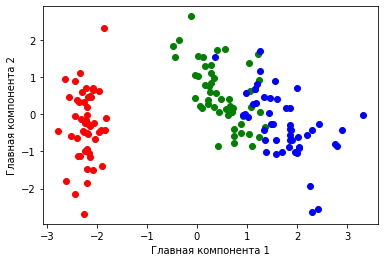

In [10]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

In [11]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.25, random_state=42)

In [12]:
#используем алгоритм к-ближайших соседей
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
print(f'Доля правильных ответов после применения PCA: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов после применения PCA: 0.9473684210526315


После применения PCA качество прогноза ухудшилось практически на 5%